# Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [2]:
# Load dataset
df = pd.read_excel('youtube_statistics.xlsx')
df= pd.DataFrame(df)
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
17725,2018-02-21,Gaali Vaaluga Video Song || Agnyaathavaasi Vid...,Aditya Music,10,11:30:01,"pspk25|""gaalivaaluga""|""gaalivaaluga lyrical""|""...",891254,22373,1968,940,False,False,False,Watch & Enjoy #GaaliVaaluga Video Song From #A...,20,2508,96,2018-02-19
11126,2018-01-15,STRIKE PARIDHABANGAL | Madras Central,Madras Central,24,09:42:00,"bus strike|""chennai""|""tamil nadu""|""gopi""|""sudh...",1157791,49926,1075,1730,False,False,False,"Here, GO-SU brings out the hilarious moments a...",9,403,37,2018-01-12
17320,2018-02-18,Tane Banavu Gharwali - Rajdeep Barot | New Guj...,RDC Gujarati,10,11:52:09,"Tane Banavu Gharwali|""rajdeep barot""|""new guja...",208433,1842,288,99,False,False,False,Tane Banavu Gharwali - Rajdeep Barot - New Guj...,26,669,92,2018-02-16
2680,2017-11-28,Review On Bigg Boss 11: MAJOR FIGHT Between Vi...,Saas Bahu Aur Betiyaan,24,11:03:37,"saas bahu beti|""saas bahu aur beti""|""saas bahu...",82687,344,40,309,False,False,False,Checkout this major fight in big boss house.. ...,12,54,77,2017-11-27
13665,2018-01-28,Agnisakshi - 26th January 2018 - ಅಗ್ನಿಸಾಕ್ಷಿ,Colors Kannada,24,07:10:30,"Colors Kannada|""ETV Kannada""|""colorskannada""|""...",79825,198,46,9,False,False,False,To watch the full episode of 'Agnisakshi' anyt...,20,621,44,2018-01-27


In [3]:
#display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
# Check unique values of each column
unique_values = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
trending_date               205
title                     16431
channel_title              1390
category_id                  17
publish_time              12375
tags                      12463
views                     31638
likes                     15473
dislikes                   5072
comment_count              6024
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description               13979
No_tags                      66
desc_len                   2850
len_title                    91
publish_date                219
dtype: int64


In [5]:
# Check duplicates
df.duplicated().sum()


4229

In [6]:
# Check missing values
df.isnull().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [7]:
# Set numerical and categorical features
cats = ['category_id', 'trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['likes','dislikes','comment_count','No_tags','desc_len','len_title', 'views']

In [8]:
# Statistic descriptive on numerical features
df[nums].describe()

,likes,dislikes,comment_count,No_tags,desc_len,len_title,views
count,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,3.679100e+04
mean,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,1.071490e+06
std,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,3.207149e+06
min,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,4.024000e+03
25%,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,1.256040e+05
50%,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,3.078360e+05
75%,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,8.066315e+05
max,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,1.254322e+08


In [9]:
# Changing data type to object
for col in cats:
    df[col] = df[col].astype('object')
    
# Statistical description of categorical features
df[cats].describe()


,category_id,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,17,205,16431,1390,12375,12463,2,2,2,13979,219
top,24,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,16462,199,19,284,333,1120,35611,36034,36780,166,318



### Descriptive Data Insight: <br>

The dataset comprises 36,791 columns, with null values present exclusively in the description column. It also contains 4,229 duplicate columns. Of the total columns, 10 are categorical and 8 are numerical. The distribution of data in the columns for views, likes, dislikes, comment_count, desc_len, and len_title exhibits skewness. Additionally, there is a pronounced dominance of False values in the columns comment_disabled, rating_disabled, and video_error_or_removed.




## Univariate Analysis

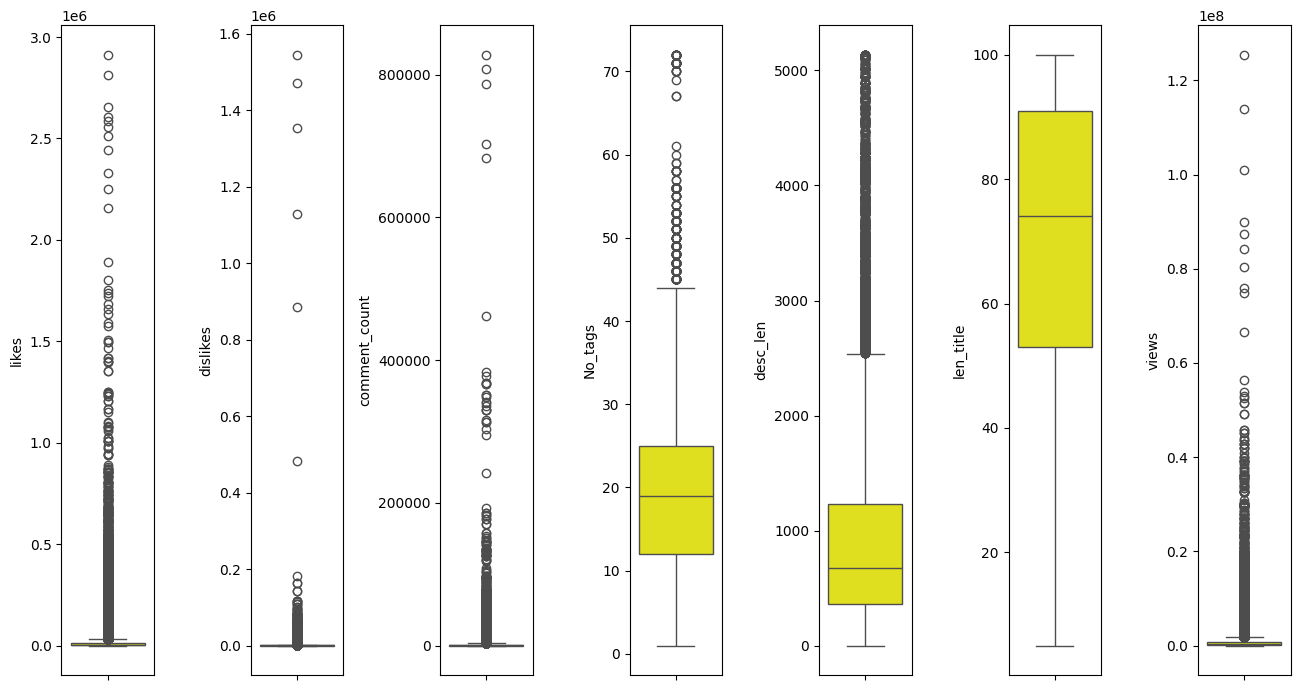

In [10]:
# Viewing data outliers using boxplot
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()
#plt.savefig('fig/boxplot.png')


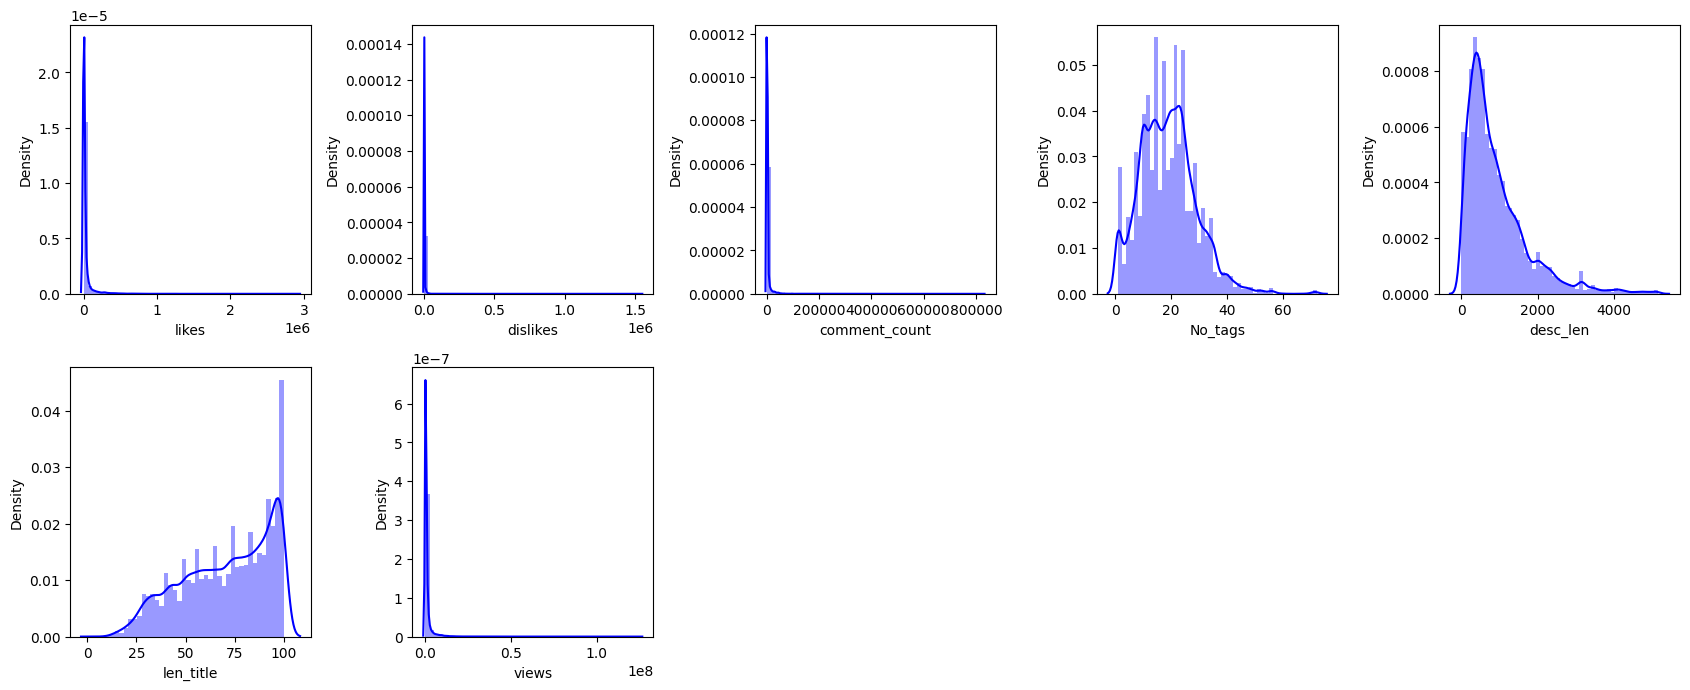

In [11]:
# Viewing distributions using distplot:
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()
plt.show()



### Univariate Analysis Insight:
The analysis reveals that the columns views, likes, dislikes, and comment_count contain numerous outliers with very extreme values. While the columns no_tags and desc_len also exhibit outliers, their extreme values are not as pronounced as those in the aforementioned columns. Notably, the column len_title shows no outliers, which may be attributed to a default word limit for video titles. Furthermore, len_title has a negatively skewed distribution, whereas the other columns display a positive skew. The distributions for views, likes, dislikes, and comment_count are primarily concentrated around 0, with a long right tail, suggesting the presence of extreme values that are significantly higher than the majority of the data.

## Bivariate Analysis 

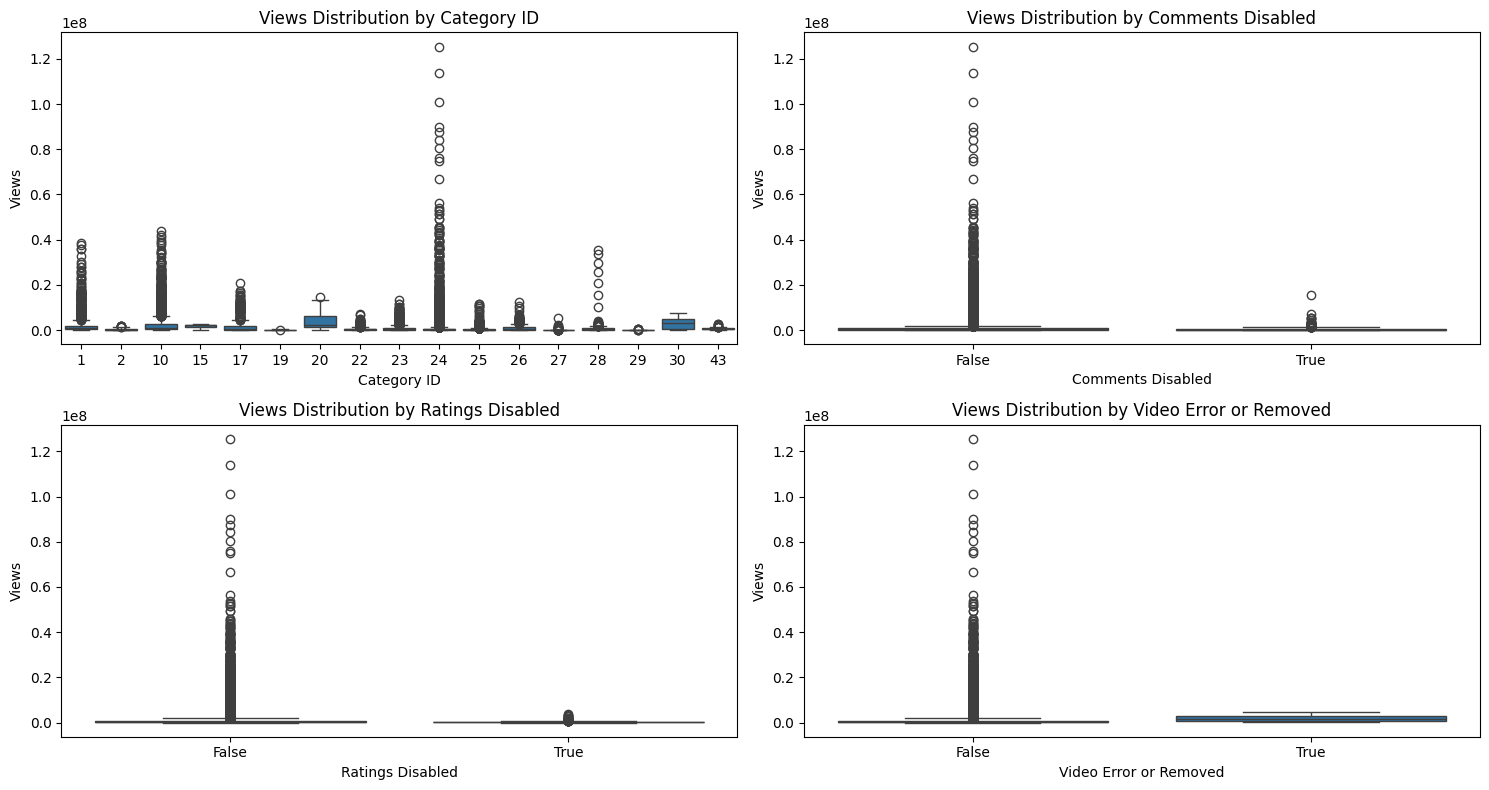

In [12]:
##----BOXPLOT
# Create a figure and axes with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Box plot for category_id
sns.boxplot(x='category_id', y='views', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Views Distribution by Category ID')
axes[0, 0].set_xlabel('Category ID')
axes[0, 0].set_ylabel('Views')

# Box plot for comments_disabled
sns.boxplot(x='comments_disabled', y='views', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Views Distribution by Comments Disabled')
axes[0, 1].set_xlabel('Comments Disabled')
axes[0, 1].set_ylabel('Views')

# Box plot for ratings_disabled
sns.boxplot(x='ratings_disabled', y='views', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Views Distribution by Ratings Disabled')
axes[1, 0].set_xlabel('Ratings Disabled')
axes[1, 0].set_ylabel('Views')

# Box plot for video_error_or_removed
sns.boxplot(x='video_error_or_removed', y='views', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Views Distribution by Video Error or Removed')
axes[1, 1].set_xlabel('Video Error or Removed')
axes[1, 1].set_ylabel('Views')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Bivariate Analysis Insights: <br>
In the analysis of 'category_id', ID 24 is observed to have the highest number of views, with IDs 10, 1, and 28 also showing relatively high total views in comparison to other categories. Regarding the features 'comments_disabled', 'ratings_disabled', and 'video_error_or_removed', it is evident that videos with False values for these features tend to have more views than those with True values. This pattern suggests that videos generally attract more views when these variables are set to False. Consequently, this implies that these features may not serve as strong predictors of the number of views.

## Multivariate Analysis

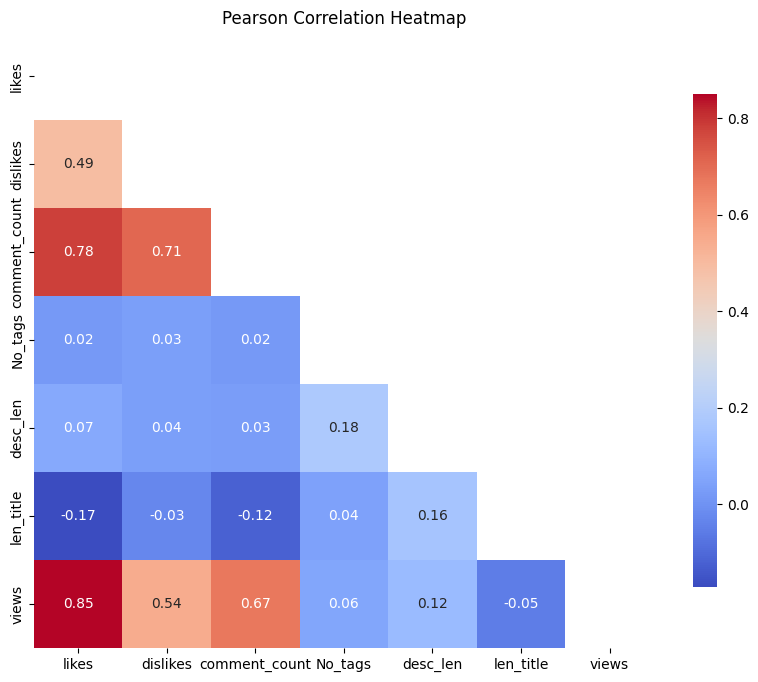

In [13]:
# Create a mask to cover the upper part of the correlation matrix
mask = np.triu(np.ones_like(df[nums].corr(), dtype=bool))

# Function to create a heatmap
def plot_heatmap(corr, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Calculate and plot heatmap for each correlation method
plot_heatmap(df[nums].corr(), 'Pearson Correlation Heatmap')


### Heatmap Insights:
The heatmap analysis reveals a very strong linear relationship between 'views' and 'likes,' with a correlation coefficient of 0.85. This suggests a robust connection between these two variables. Additionally, the correlations between 'views' and 'dislikes' (0.54) and between 'views' and 'comment_count' (0.67) indicate that both dislikes and comment_count also exhibit significant linear relationships with views. Consequently, the features likes, dislikes, and comment_count are likely to serve as effective predictors for views. Furthermore, there is a pronounced linear correlation among the features 'likes,' 'dislikes,' and 'comment_count,' highlighting their interrelated nature.####

<Figure size 1000x800 with 0 Axes>

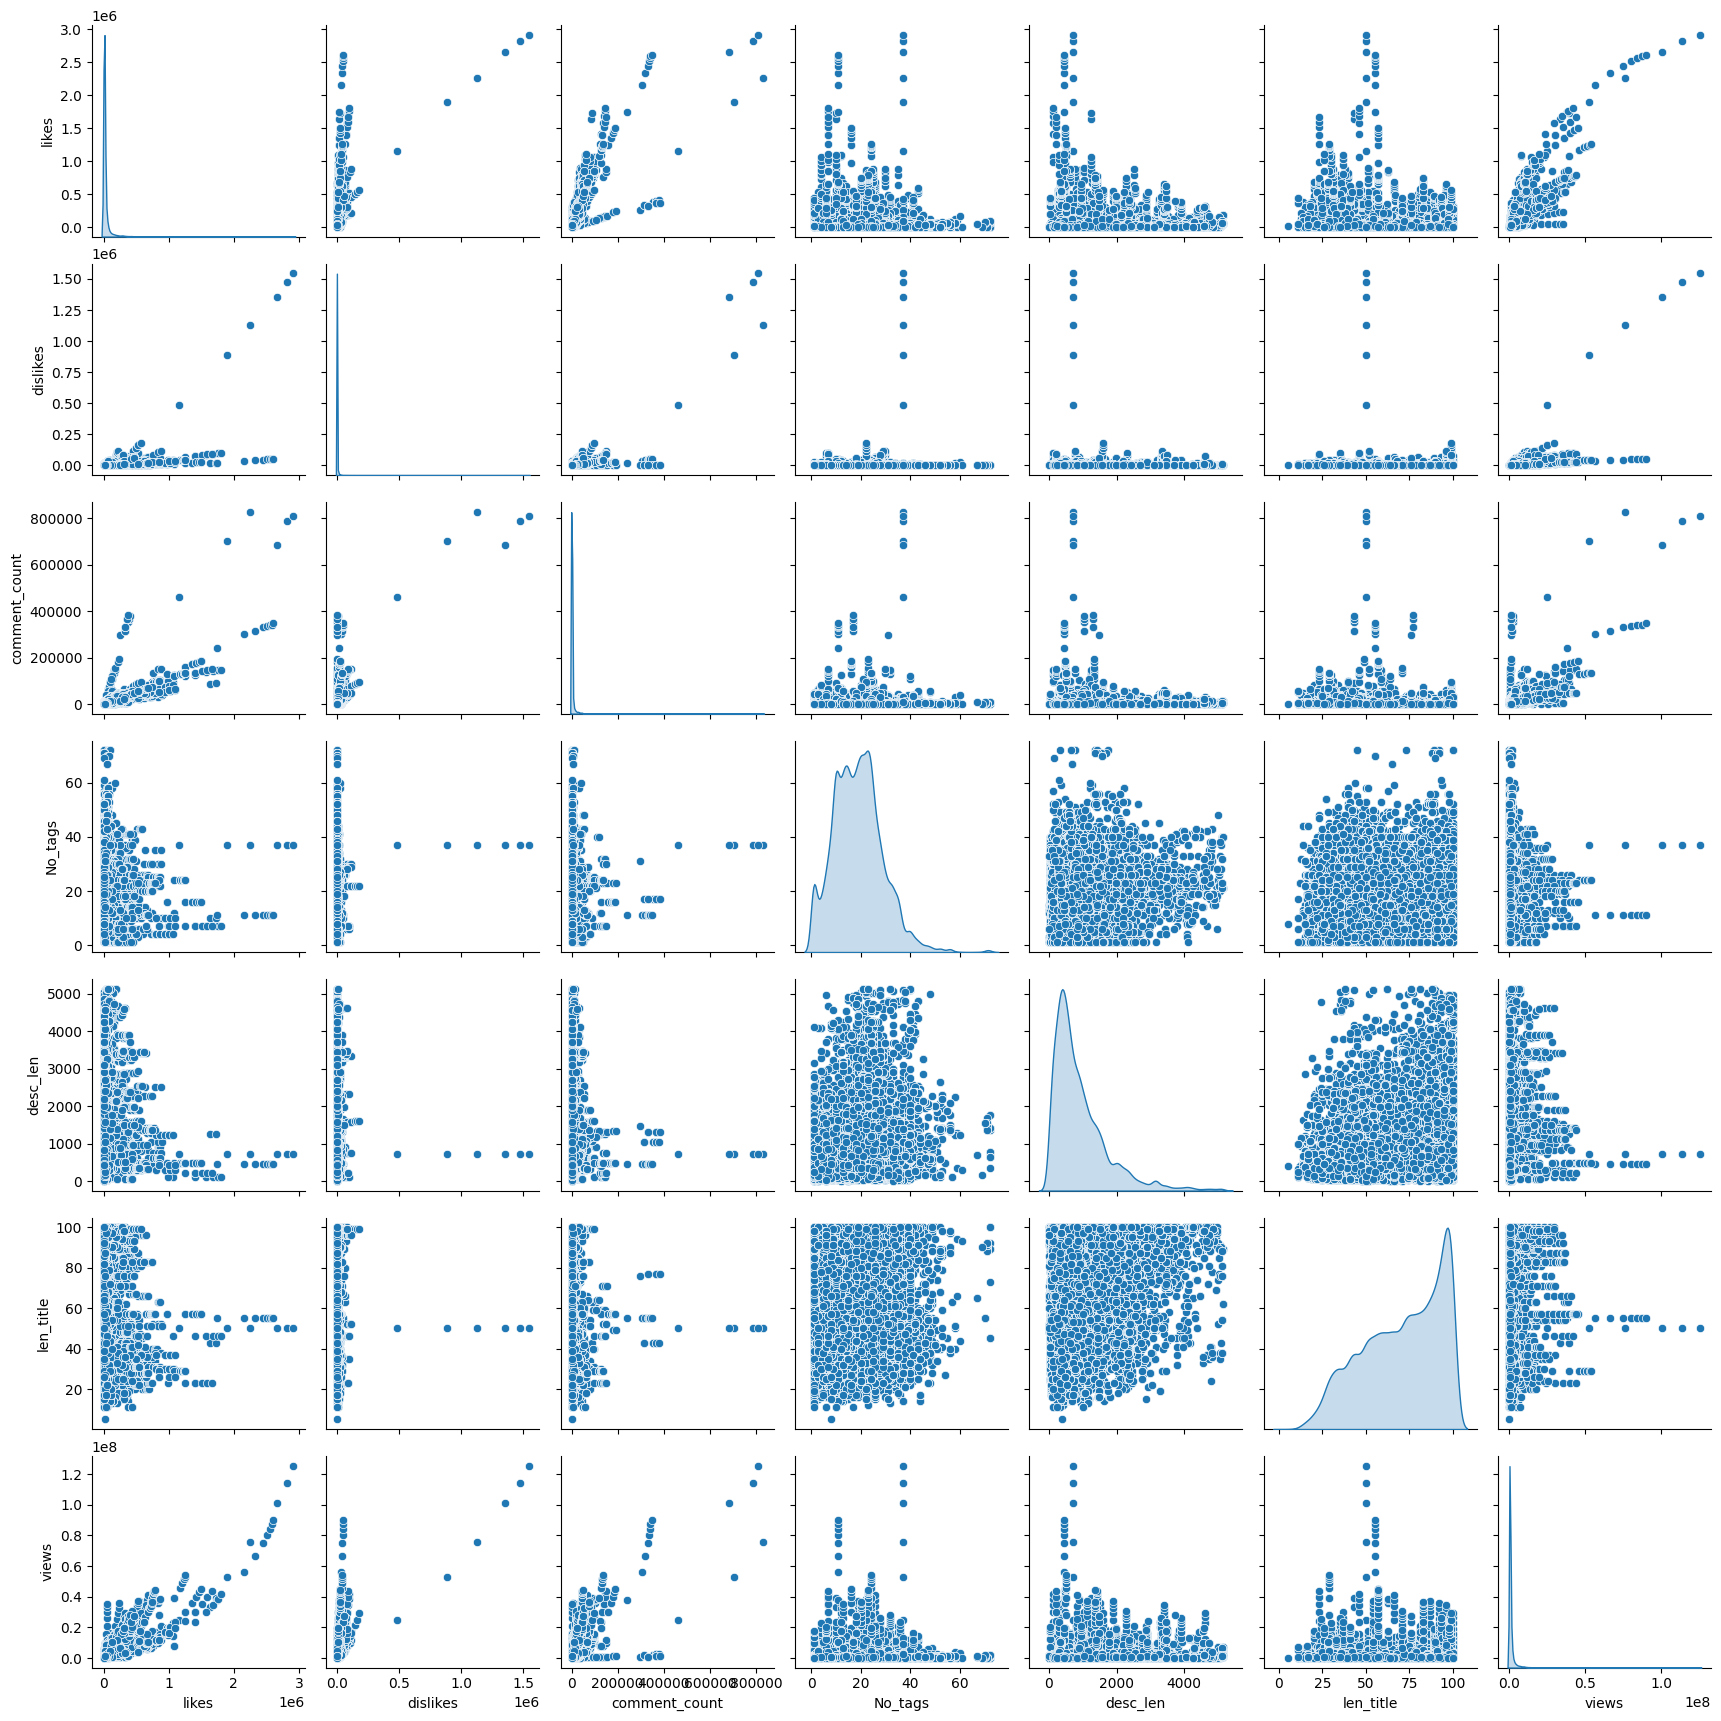

In [14]:
# Generating Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df[nums], diag_kind='kde')


### Pairplot Insight:
There is a linear relationship between 'views', 'likes', 'dislikes', and 'comment_count', meaning that as the value of one column increases, the values in the other columns also increase.

# Data Pre Processing

### Handling Duplicates

In [15]:
# Drop duplicates across all columns
df = df.drop_duplicates()


### Handling Null Values

In [16]:
# Drop rows with null values
df = df.dropna()


### Feature Engineering

##### extract the day of the month (1-31) from both the 'publish_date' and 'trending_date'.

In [17]:
# Ensure 'publish_date' and 'trending_date' are in datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

# Extract day of the month
df['publish_dd'] = df['publish_date'].dt.day
df['trending_dd'] = df['trending_date'].dt.day

##### Show average views by date

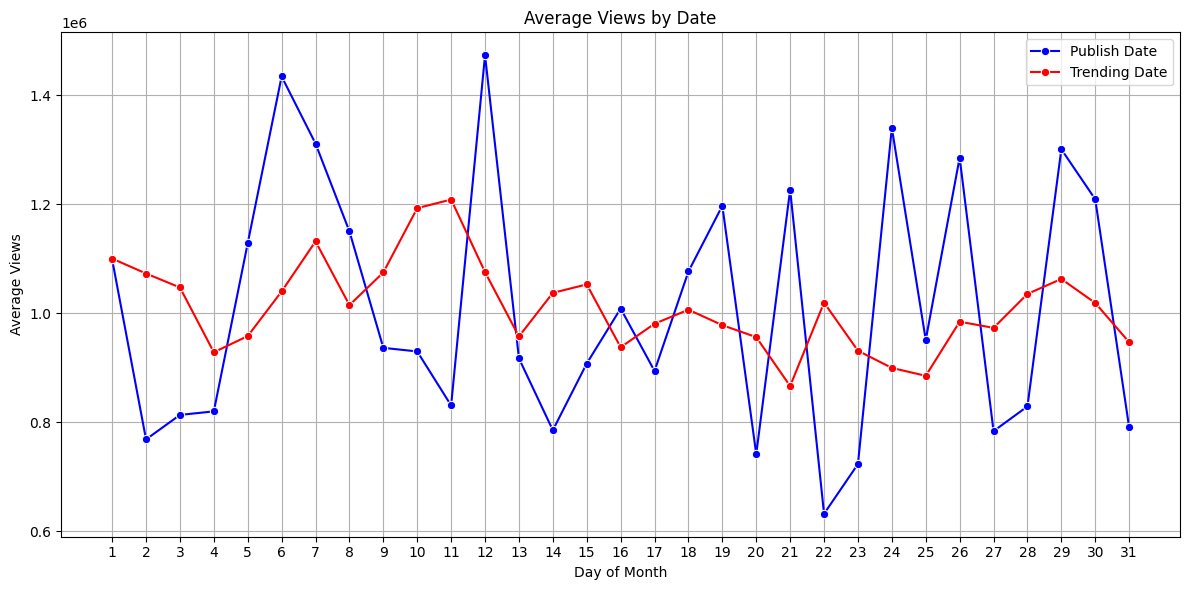

In [18]:
# Group by 'publish_day_month' and calculate average views
average_publish_views = df.groupby('publish_dd')['views'].mean()

# Group by 'trending_day_month' and calculate average views
average_trending_views = df.groupby('trending_dd')['views'].mean()

# Create a figure and set the size
plt.figure(figsize=(12, 6))

# Plotting the average views per day for publish_date
sns.lineplot(x=average_publish_views.index, y=average_publish_views.values, marker='o', color='blue', label='Publish Date')

# Plotting the average views per day for trending_date
sns.lineplot(x=average_trending_views.index, y=average_trending_views.values, marker='o', color='red', label='Trending Date')

# Customize labels and title
plt.title('Average Views by Date')
plt.xlabel('Day of Month')
plt.ylabel('Average Views')
plt.grid(True)
plt.tight_layout()

# Set xticks to show all days from 1 to 31
plt.xticks(range(1, 32))

# Show plot with legend
plt.legend()
plt.show()


The visualization shows that the average views for both features are inconsistent or biased, which could adversely affect the model if used.

##### Create a feature with value of the difference in days between publishing and trending.


In [19]:

# Convert 'trending_date' and 'publish_date' to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Calculate the difference in days between 'publish_date' and 'trending_date'
df['days_to_trend'] = (df['trending_date'] - df['publish_date']).dt.days


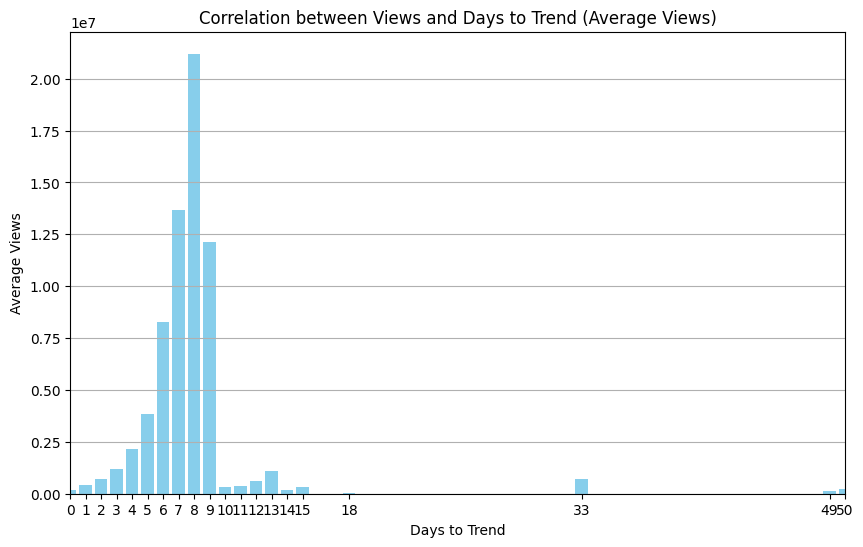

In [20]:
# Hitung rata-rata views untuk setiap nilai unik dari days_to_trend
avg_views = df.groupby('days_to_trend')['views'].mean().reset_index()

# Visualisasi korelasi antara views dengan days_to_trend menggunakan bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_views['days_to_trend'], avg_views['views'], color='skyblue')
plt.title('Correlation between Views and Days to Trend (Average Views)')
plt.xlabel('Days to Trend')
plt.ylabel('Average Views')
plt.grid(axis='y')
plt.xticks(avg_views['days_to_trend'])
plt.xlim(0, 50)  # Batasi sumbu x dari 0 hingga 50
plt.show()

Based on the graph above, it is observed that the time interval between the publish date and the trending date with the highest number of views is approximately 7 to 9 days. This suggests that videos tend to accumulate the most views within this timeframe before becoming trending.

In [21]:
# Check Correlation Coefficient of the new feature with target
correlation_coefficient = df['days_to_trend'].corr(df['views'])

print(f"Correlation Coefficient between 'days_to_trend' and 'views': {correlation_coefficient}")

Correlation Coefficient between 'days_to_trend' and 'views': 0.1810300230384716


##### Extract the 'publish_time' to only show the hour, from 0 to 23.

In [22]:

# Function to extract hour from 'publish_time'
def extract_hour(time_str):
    return int(time_str.split(':')[0])

# Apply the function to create a new column with hour values
df['publish_time_bin'] = df['publish_time'].apply(extract_hour)


##### Show distribution of 'views' in 24 hour

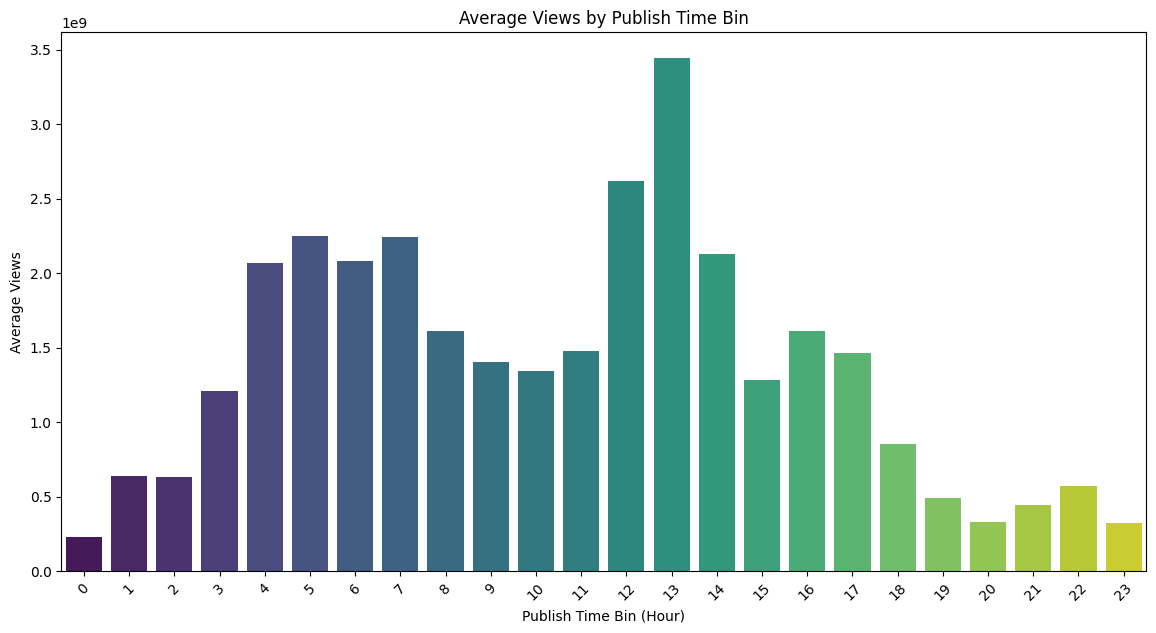

In [23]:

# Group by 'publish_time_bin' and calculate the average views
grouped_publish_time_bin = df.groupby('publish_time_bin')['views'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='publish_time_bin', y='views', data=grouped_publish_time_bin, palette='viridis')
plt.title('Average Views by Publish Time Bin')
plt.xlabel('Publish Time Bin (Hour)')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


The graph above indicates that the prime time within a 24-hour period occurs between 12:00 PM and 1:00 PM. This time frame represents the peak period of activity or engagement, suggesting that this hour is the most significant for the analyzed metric.

##### Extract the trending and publishing dates to obtain the days of the week (1 - 7 = Monday-Sunday)

In [24]:
# Ensure 'trending_date' and 'publish_date' are in datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Extract the day of the week from 'trending_date' and 'publish_date' (Monday-Sunday)
df['trending_day'] = df['trending_date'].dt.strftime('%A')
df['publish_day'] = df['publish_date'].dt.strftime('%A')

# Map days of week to numerical values
day_to_number = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply mapping to 'trending_day' and 'publish_day' columns
df['trending_day'] = df['trending_day'].map(day_to_number)
df['publish_day'] = df['publish_day'].map(day_to_number)


##### Show 'views' distribution across publish day (1 - 7 = Monday-Sunday)

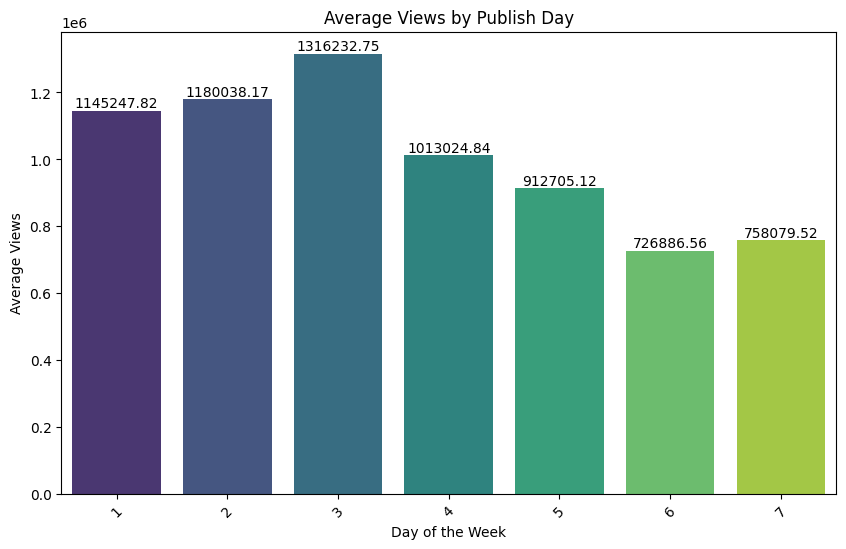

In [25]:

# Group by 'publish_day' and calculate the average views
daywise_views = df.groupby('publish_day')['views'].mean().reset_index()

# Plot the average views by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='publish_day', y='views', data=daywise_views, palette='viridis')

# Annotate the bars with the average views
for i in range(len(daywise_views)):
    plt.text(i, daywise_views['views'][i], round(daywise_views['views'][i], 2), ha='center', va='bottom')

plt.title('Average Views by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


The results from the above graph indicate that the highest number of views within a week occurs on Wednesdays. This finding suggests a notable peak in viewership on this particular day, highlighting Wednesday as the day with the greatest engagement in terms of views during the week.

### Splitting Data

In [34]:
# Assign variable for features and target
X = df[['likes', 'dislikes', 'publish_time_bin', 'comment_count', 'category_id']]
y = df[['views']]

# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Removing Outliers form Train Data

In [35]:
from scipy import stats

# Convert X_train and y_train to DataFrames if they are numpy arrays
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train, name='views')

# Concatenate X_train and y_train for outlier removal on the training set
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate z-scores
z_scores = np.abs((train_data - train_data.mean()) / train_data.std())

# Define a threshold for z-score
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outliers
train_data_filtered = train_data[~outliers]

# Separate X_train and y_train again
X_train_no_outliers = train_data_filtered.drop(columns=['views'])
y_train_no_outliers = train_data_filtered['views']

### Data Standardization (for no-outliers data)

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train_no_outliers)

# Transform training data
X_train_no_outliers_scaled = scaler.transform(X_train_no_outliers)

# Transform test data
X_test_scaled= scaler.transform(X_test)


### Modelling with Linear Regression (for no-outliers data)

##### Creating Evaluation Function (for no-outliers data)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression_clean(model):
  y_pred = model.predict(X_test_scaled)
  y_pred_train = model.predict(X_train_no_outliers_scaled)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train_no_outliers, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train_no_outliers, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train_no_outliers, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))


In [38]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_no_outliers_scaled, y_train_no_outliers)
eval_regression_clean(linear_regression)

RMSE (test): 3064324.1206958652
RMSE (train): 729575.872601369
MAPE (test): 1.6033165451023557
MAPE (train): 1.5478071988350783
r2 (test): 0.03496565741886426
r2 (train): 0.5897148058396859
r2 (cross-val test): 0.4866064944902836
r2 (cross-val train): 0.762455748910971


##### Model Evaluation Insights:

The evaluation metrics reveal that the model's performance needs improvement. High Root Mean Squared Error (RMSE) on both the training and test datasets indicates significant prediction errors. Despite removing outliers, the Mean Absolute Percentage Error (MAPE) remains high, suggesting substantial prediction errors and potentially uneven data distribution. The R-Squared (R²) values are similar for both training (0.7761) and test data (0.7157), indicating good explanation of data variability. However, the lower cross-validation R² (0.4866) suggests potential overfitting, with the model performing better on training data than on unseen data.

#### Regularization with Ridge

In [39]:
from sklearn.linear_model import Ridge
ridge_L1 = Ridge()
ridge_L1.fit(X_train_no_outliers_scaled, y_train_no_outliers)
eval_regression_clean(ridge_L1)

RMSE (test): 3064388.2037138776
RMSE (train): 729575.8779177683
MAPE (test): 1.6033945689390374
MAPE (train): 1.547872809003579
r2 (test): 0.034925294221392456
r2 (train): 0.5897147998602121
r2 (cross-val test): 0.4866064830395961
r2 (cross-val train): 0.7624557489109666


#### Hypermarameter Tuning (Random Seacrh)

In [40]:
from sklearn.model_selection import RandomizedSearchCV

alpha = [0.001, 0.01, 0.1, 1]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)


random_search = RandomizedSearchCV(ridge_L1, hyperparameters, scoring='r2', cv=7, random_state=42)
random_search.fit(X_train, y_train)
eval_regression_clean(random_search)

RMSE (test): 3111876.9970353483
RMSE (train): 1232954.9610949634
MAPE (test): 7.473797131780787
MAPE (train): 7.887058462209708
r2 (test): 0.004782018953952694
r2 (train): -0.17176182074059532
r2 (cross-val test): 0.4866064944783203
r2 (cross-val train): 0.762455748910971


##### Model Evaluation Insights:
The overall performance of the models, evaluated on the no-outlier data, remains suboptimal despite extensive hyperparameter tuning. Consequently, it is pertinent to explore the impact of including outliers in the dataset. We will proceed by modeling the data without removing outliers to assess whether this approach improves the model's performance.

### Modelling with Linear Regression

### Data Standardization

In [41]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training data
X_train = scaler.transform(X_train)

# Transform test data
X_test = scaler.transform(X_test)

### Modelling with Linear Regression

#### Creating Evaluation Function

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))


In [43]:
# Train linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
eval_regression(regressor)

RMSE (test): 1663183.5564985394
RMSE (train): 1511900.6946861686
MAPE (test): 1.657439084233149
MAPE (train): 1.6748662449187444
r2 (test): 0.7157151379152643
r2 (train): 0.7760734309572428
r2 (cross-val test): 0.4866064944902836
r2 (cross-val train): 0.762455748910971


##### Model Evaluation Insights:

The analysis reveals that outlier handling significantly reduces RMSE on the training data, suggesting improved pattern learning. However, RMSE increases on the test data, indicating greater prediction challenges on unseen data. MAPE decreases in the training data, from 167.49% to 154.78%, and shows a slight reduction in the test data, from 165.74% to 160.33%, reflecting improved accuracy. R-squared (R²) increases slightly in both datasets, but the test data R² drops significantly, from 0.716 to 0.035, indicating diminished ability to explain variance in unseen data. Cross-validation R² remains stable, suggesting that overall model stability is not impacted by outlier handling.

#### Regularization with Ridge

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE (test): 1663196.8198276777
RMSE (train): 1511900.7124120086
MAPE (test): 1.6576235660711822
MAPE (train): 1.6750528521196577
r2 (test): 0.7157106037449803
r2 (train): 0.7760734257065188
r2 (cross-val test): 0.4866064830395961
r2 (cross-val train): 0.7624557489109666


##### Hyperparameter Tuning (Random search)

In [45]:
from sklearn.model_selection import RandomizedSearchCV

alpha = [0.001, 0.01, 0.1, 1]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=7, random_state=42)
rs.fit(X_train, y_train)
eval_regression(rs)

RMSE (test): 1663196.8198276777
RMSE (train): 1511900.7124120086
MAPE (test): 1.6576235660711822
MAPE (train): 1.6750528521196577
r2 (test): 0.7157106037449803
r2 (train): 0.7760734257065188
r2 (cross-val test): 0.4866064944783203
r2 (cross-val train): 0.762455748910971


#### Regularization with Lasso

In [46]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
eval_regression(lasso_model)

RMSE (test): 1663183.7561301796
RMSE (train): 1511900.6946874403
MAPE (test): 1.6574385900279054
MAPE (train): 1.674865707916039
r2 (test): 0.7157150696699327
r2 (train): 0.776073430956866
r2 (cross-val test): 0.48660648285020003
r2 (cross-val train): 0.7624557489109651


##### Hyperparameter Tuning (Random Seacrh)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
clf.fit(X_train, y_train)
eval_regression(clf)

RMSE (test): 1663183.5605477705
RMSE (train): 1511900.694686169
MAPE (test): 1.6574390748784356
MAPE (train): 1.6748662347188648
r2 (test): 0.7157151365310093
r2 (train): 0.7760734309572426
r2 (cross-val test): 0.48660649425731284
r2 (cross-val train): 0.762455748910971


#### Regularization with ElasticNet

In [48]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet()
en_model.fit(X_train, y_train)
eval_regression(en_model)

RMSE (test): 1824901.5627412717
RMSE (train): 1724767.713388543
MAPE (test): 2.8530711089589635
MAPE (train): 2.88891070834315
r2 (test): 0.6577430660082351
r2 (train): 0.7085793513542458
r2 (cross-val test): 0.4864582188340282
r2 (cross-val train): 0.7624550132945003


##### Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

# Initialize GridSearchCV
gs_en = GridSearchCV(estimator=en_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
gs_en.fit(X_train, y_train)
eval_regression(gs_en)

RMSE (test): 1663210.5199525813
RMSE (train): 1511900.7159223757
MAPE (test): 1.6573946407038576
MAPE (train): 1.6748191227597315
r2 (test): 0.7157059202147664
r2 (train): 0.7760734246666827
r2 (cross-val test): 0.48656565143261254
r2 (cross-val train): 0.7624553135397804


##### The Comparison of Linear Regression with and without Outlier Handling:

Overall, the evaluation of the linear regression model's predictions using training data without outlier handling remains weak. Handling outliers led to a significant decline in the model's prediction performance on the test data, despite a modest improvement in RMSE and MAPE on the training data. Consequently, due to the lack of significant benefits from outlier handling, further model testing will be conducted using the training data without outlier adjustments.


### Modelling with Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
eval_regression(dt)

RMSE (test): 1371698.771227229
RMSE (train): 25520.729667658896
MAPE (test): 0.6720087113843535
MAPE (train): 0.009307031767315151
r2 (test): 0.8066292113181591
r2 (train): 0.9999361963877229
r2 (cross-val test): 0.658948784061959
r2 (cross-val train): 0.9999474137401568


##### Model Evaluation Insights:

The performance metrics reveal that the model is overfitting. The Mean Absolute Percentage Error (MAPE) for the test set is 65.28%, significantly higher than the training set MAPE of 0.93%, indicating poor generalization. The R² value for the test set is 0.8340, much lower than the training set R² of 0.9999, showing that the model explains training data variability almost perfectly but struggles with test data. Cross-validation further confirms this issue, with lower R² on the test set compared to the training set, reinforcing the model's strong fit to the training data but weak performance on new data.

##### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

# Definisi parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi model Decision Tree
dt = DecisionTreeRegressor(random_state=42)

# Grid search untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Menggunakan model dengan parameter terbaik
best_dt = grid_search.best_estimator_

# Evaluasi model dengan parameter terbaik
eval_regression(best_dt)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE (test): 1138667.7398808892
RMSE (train): 644442.6237811144
MAPE (test): 0.6734489306387218
MAPE (train): 0.6273344122770423
r2 (test): 0.8667499432650938
r2 (train): 0.9593156288911125
r2 (cross-val test): 0.6734771888108314
r2 (cross-val train): 0.957066483792528


##### Model Evaluation Insights:
Following hyperparameter tuning for the Decision Tree model, focusing on parameters such as max_depth, min_samples_split, min_samples_leaf, and max_features, an improvement in model performance was observed. Despite this enhancement, the percentage of error measured by Mean Absolute Percentage Error (MAPE) remains relatively high, exceeding 60%. This suggests that while tuning has refined the model, there are still substantial errors to address.

### Modelling with Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
eval_regression(rf)

RMSE (test): 890945.9454056893
RMSE (train): 322258.32415866654
MAPE (test): 0.530795913320407
MAPE (train): 0.20403339276234278
r2 (test): 0.9184214313891895
r2 (train): 0.9898265704634149
r2 (cross-val test): 0.7855731507346138
r2 (cross-val train): 0.9926969908994675


##### Model Evaluation Insights:
The RMSE is higher for the test data than for the training data, but both are relatively low, indicating good predictive performance. MAPE is higher on the test data, suggesting reduced generalization. The R-squared (R²) is very high on both training and test data, showing strong model performance. Cross-validation R² is also high, but the slight disparity between training and test data suggests potential overfitting.

#### Hyperparameter Tuning

#### Hyperparameter Tuning with RandomSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, mean_squared_error

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 301),        # Randomly sample number of trees between 100 and 301
    'max_depth': [None, 10, 20, 30],          # Same as before
    'min_samples_split': randint(2, 11),      # Randomly sample min samples split between 2 and 10
    'min_samples_leaf': randint(1, 5),        # Randomly sample min samples leaf between 1 and 4
    'max_features': ['auto', 'sqrt', 'log2']  # Same as before
}

# Definisi skor yang ingin dioptimalkan (misalnya, Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring=scorer, verbose=1, n_jobs=-1, random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Use the model with the best parameters
best_rf = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate regression (if needed)
eval_regression(best_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 283}
Mean Squared Error on Test Set: 780866610610.7318
RMSE (test): 883666.5720794987
RMSE (train): 316764.39364262746
MAPE (test): 0.5310318143010728
MAPE (train): 0.27499291936825954
r2 (test): 0.919749042574864
r2 (train): 0.990170491351215
r2 (cross-val test): 0.7845040813036045
r2 (cross-val train): 0.9924376997534157


##### Model Evaluation Insights:

Tuning the Random Forest model led to improved performance, with RMSE for the test set decreasing from 900,859.19 to 877,788.67 and RMSE for the training set dropping from 320,929.46 to 313,613.05, indicating reduced prediction errors. The MAPE for the test set remained nearly unchanged, while the MAPE for the training set increased from 20.32% to 27.60%, suggesting potential overfitting. The R-squared values also improved: the test R² rose from 0.9166 to 0.9208, and the training R² increased slightly from 0.9899 to 0.9904. Cross-validation showed a minor increase in test R² from 0.7821 to 0.7842, and a negligible decrease in training R² from 0.9926 to 0.9924. Overall, the tuning improved model accuracy and explanatory power, but the increased MAPE for the training data indicates possible overfitting.

#### Hyperparameter Tuning with GridSearchCV

In [39]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest
rf = RandomForestRegressor(random_state=42)

# Definisi parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],        # Jumlah pohon dalam ensemble
    'max_depth': [None, 10, 20, 30],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],         # Jumlah minimum sampel untuk membagi simpul
    'min_samples_leaf': [1, 2, 4],           # Jumlah minimum sampel di simpul daun
    'max_features': ['auto'] # Jumlah fitur yang dipertimbangkan untuk membagi simpul
}

# Definisi skor yang ingin dioptimalkan (misalnya, Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scorer, verbose=1, n_jobs=-1)

# Melakukan grid search untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Menggunakan model dengan parameter terbaik
best_rf = grid_search.best_estimator_

# Evaluasi model dengan parameter terbaik pada data uji
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluasi regresi (jika diperlukan)
eval_regression(best_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error on Test Set: 767718504738.1045
RMSE (test): 876195.4717630675
RMSE (train): 313981.49622212874
MAPE (test): 0.5322005513583901
MAPE (train): 0.2761134463976489
r2 (test): 0.9211002952347519
r2 (train): 0.990342444732522
r2 (cross-val test): 0.7836159796420132
r2 (cross-val train): 0.9923452216863666


##### Model Evaluation Insights:
The RMSE for the test set is slightly lower with Grid Search (876,195.47) compared to Random Search (877,788.67), indicating marginally better prediction performance. The RMSE for the training set is slightly higher with Grid Search (313,981.50) than with Random Search (313,613.05). MAPE values are nearly the same for both methods, showing comparable accuracy. Random Search has a slightly higher R² on the test set (0.7842) compared to Grid Search (0.7836), with similar R² values for the training set.

# Conclusion
The Random Forest model, tuned using both Random Search and Grid Search methods, produced very similar results. Grid Search demonstrated a slight advantage in terms of RMSE (test) and R² (test), while Random Search excelled in R² cross-validation. Despite the minimal performance differences between the two methods, both provided satisfactory outcomes for the model. Additionally, Random Search offered faster computation times compared to Grid Search. Therefore, considering both performance and computational efficiency, the Random Forest model with Random Search tuning is deemed the best fit for this predictive task.

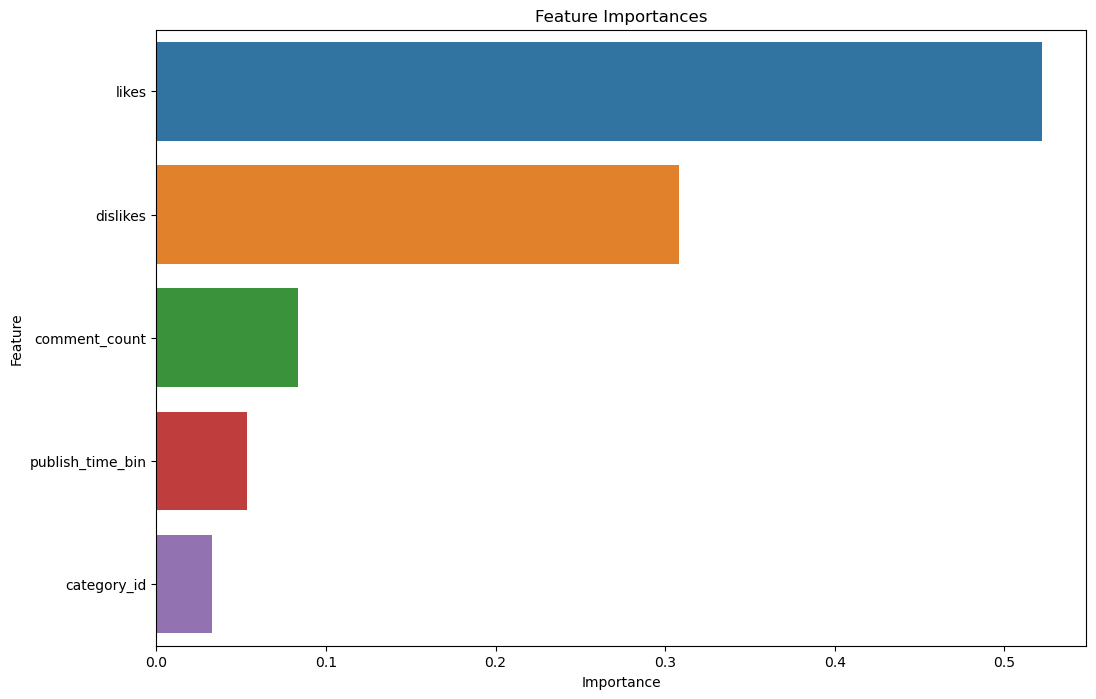

In [41]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Feature Importance Interpretation:

The analysis shows that 'likes' is the most important predictor in the model, followed by 'dislikes' and 'comment_count.' 'Publish_time_bin' has moderate importance, while 'category_id' is the least significant. The results indicate that the model primarily relies on user interactions (likes, dislikes, comment count) for accurate view predictions, with publication time and category ID having less impact.


# Insights and Recommendations

## Optimal Publishing Time: 
Analysis shows that the timing of content publication significantly impacts the number of views. Data indicates that peak views occur on Wednesdays, followed by Tuesdays and Mondays. The most effective publishing time is between 12:00 and 13:00, when many people are active on YouTube during their daily break. Wednesdays often see high engagement as it is mid-week, while Tuesdays and Mondays show increased interest as people seek entertainment after the weekend.
#### Recommendation: 
Publish content during the prime time of 12:00 to 13:00 and focus on Wednesdays, Tuesdays, and Mondays to maximize visibility and engagement.

## Role of Engagement: 
Interactions such as likes, dislikes, and comments not only reflect responses to content but also influence its exposure to others. High engagement increases the likelihood of content attracting attention and going viral.
#### Recommendation: 
Enhance engagement by incorporating strong calls-to-action (CTAs) in your content. Encourage actions such as subscribing, liking, commenting, sharing, or clicking links for additional information. Effective CTAs boost interaction, build a loyal community, and improve content success on YouTube.

## Consistency and Predictability: 
Features selected for analysis are based on their consistent relationship with views. Companies should consider these features when developing more targeted and effective content strategies.
#### Recommendation: 
Use consistent features to guide content strategy development and ensure that your approach is data-driven and aligned with patterns observed in the analysis.

## Data-Driven Decision Optimization: 
Utilizing data on publishing times and interactions allows companies to make better decisions for planning and executing marketing campaigns, enhancing overall content marketing efficiency and effectiveness.
#### Recommendation: 
Leverage data insights to optimize content scheduling and engagement strategies, improving marketing campaign planning and execution.